In [11]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy.stats import kruskal

In [2]:
# Load the csv data file and have a first hand look at it
data = pd.read_csv("C:\\Users\\sapta\\Downloads\\bank_data.csv")
data.shape
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


I found that there are no missing values. Data type is also in order for all the columns.
We can proceed with the tasks.

In [3]:
# Rounding the values upto two decimal points
data["actual_recovery_amount"] = data["actual_recovery_amount"].round(2)

In [4]:
#Now we will make a copy of the data frame and proceed from there.
data1 = data.copy()

Text(0.5, 1.0, 'Age vs. Expected Recovery Amount scatter')

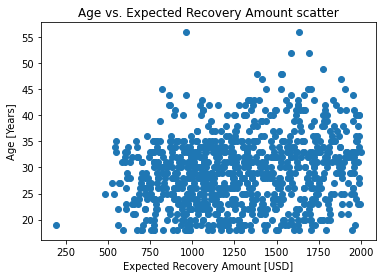

In [5]:
#Task 1.1: making a scatter plot of the age as a function of Expected Recovery Amount for a small window of

#Expected Recovery Amount, $0 to $2000
data_win1 = data1[data1["expected_recovery_amount"]<= 2000]
plt.scatter(y=data_win1["age"], x =data_win1["expected_recovery_amount"])
plt.xlabel("Expected Recovery Amount [USD]")
plt.ylabel("Age [Years]")
plt.title("Age vs. Expected Recovery Amount scatter")

In [9]:
#Task 1.2: Statistical test: age vs. expected recovery amount, for range: $900 to $1100

# Selecting two windows: 901-1000 & 1001-1100 to check if there is any jump below and above 1000 (L0-L1 boundary)
data_win2 = data1[(data1["expected_recovery_amount"] >= 901) & (data1["expected_recovery_amount"]<= 1000)]
data_win3 = data1[(data1["expected_recovery_amount"] >= 1001) & (data1["expected_recovery_amount"]<= 1100)]

#Comparing the mean value to identify any jump in values
print(data_win2["age"].mean(), data_win3["age"].mean())


27.1046511627907 28.68421052631579


I found for $901-1000 window, the average age is: 27.1046511627907 
and for $1001-1100 window, the average age is: 28.68421052631579.
SO apparently there is no "jump" or discontinuity.

In [10]:
#Task 1.3: Statistical test: sex vs. expected recovery amount, for range: $900 to $1100
print("Below: ",data_win2["sex"].value_counts(normalize=True), "Above: ",data_win3["sex"].value_counts(normalize=True))

Below:  Male      0.639535
Female    0.360465
Name: sex, dtype: float64 Above:  Male      0.578947
Female    0.421053
Name: sex, dtype: float64


I found the following, studying sex vs expected recovery amount.
between $901-1000: Male = 64%, Female = 36% and
between $1001-1100: Male = 58%, Female = 42%.
No significant jump was seen. As for the total data set, the values are: Male = 52%, Female = 48%

Text(0.5, 1.0, 'Expected vs. Actual Recovery Amount')

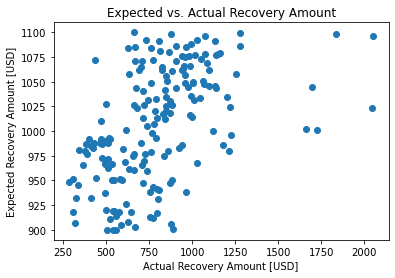

In [12]:
#Task 1.4: Exploratory graphical analysis: recovery amount. Make scatter plot of Expected Recovery Amount (Y) vs.
#Actual Recovery Amount (X) for Expected Recovery Amounts between $900 to $1100

# Selecting a window: $900-1100 
data_win4 = data1[(data1["expected_recovery_amount"]>=900) & (data1["expected_recovery_amount"]<=1100)]
plt.scatter(x=data_win4["actual_recovery_amount"], y = data_win4["expected_recovery_amount"])
plt.xlabel("Actual Recovery Amount [USD]")
plt.ylabel("Expected Recovery Amount [USD]")
plt.title("Expected vs. Actual Recovery Amount")

In [13]:
#Task 1.5: Statistical analysis: recovery amount. We are going to do this for two different windows of the expected
#recovery amount $900 to $1100 and for a narrow range of $950 to $1050 to see if our results are consistent. The
#statistical test we will use is the Kruskal-Wallis test.

#Selecting a window: $950-1050
data_win5 = data1[(data1["expected_recovery_amount"]>=950) & (data1["expected_recovery_amount"]<=1050)]

#Conduct the Kruskal-Walli's test on the two windows (900-1100 & 950-1050)
result = kruskal(data_win4["expected_recovery_amount"], data_win5["expected_recovery_amount"])
print("Kruskal-Wallis Test Statistic:", result.statistic)
print("P-value:", result.pvalue)

Kruskal-Wallis Test Statistic: 1.4647538090346246
P-value: 0.22617525205870362


I got the following values upon conducting Kruskal-Willi's test:
Kruskal-Wallis Test Statistic: 1.4647538090346246
P-value: 0.22617525205870362
The test statistics measures the difference in ranks between the groups and the P-value represents the probability of obtaining the observed differences in ranks. P-value here is moderately larger than commonly used significance value 0.05. This suggests that the groups represented by the "expected_recovery_amount" column in the two DataFrames are statistically similar with respect to the variable being tested, i.e., there is no jump or difference, the distribution is similiar below and above the threshold at $1000.

In [ ]:
#Task 1.6.1: Regression modeling: no threshold. This model predicts the actual recovery amount (outcome or dependent
#variable) as a function of the expected recovery amount (input or independent variable).

# At the first instance, I conceived the task wrongly and constructed the model on the full dataset. I wanted to keep it.

# Making a copy
regdf = data.copy()

# making a group of all the columns, not necessary for this task
col = ["id", "recovery_strategy","age","sex"]

# Dropping those columns
regdf_copy = regdf.drop(columns=col, axis=1)
regdf_copy.head()

# Split the data into features (X) and target variable (y)
X = regdf_copy[['expected_recovery_amount']]
y = regdf_copy['actual_recovery_amount']

# Add a constant term (intercept)
X = sm.add_constant(X)

# Split the data into training and testing sets (train:test=80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model based on Ordinary Least Square method
model = sm.OLS(y_train, X_train).fit()

# Print model summary
print(model.summary())

# Calculate RMSE
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE = ",rmse)

# Regression diagnostics- Residual plot analysis
residuals=y_test-y_pred
sns.regplot(x=y_pred, y=residuals, scatter=True, 
             fit_reg=False)
plt.title("Residual plot")
plt.show()
residuals.describe()

#Creating a joint scatter plot with the regression line
sns.jointplot(x=regdf_copy["expected_recovery_amount"], y = regdf_copy["actual_recovery_amount"], data=regdf_copy, kind="reg")

I found the adjusted R2 value as 0.82 which is very high compared to what has been given in the text of the next task (0.26). Then I realized that I should be running this on the window $900-1100. So I constructed the model again. I don't know if I got this right this time or not. Let us proceed.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 158 to 341
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   expected_recovery_amount  184 non-null    int64  
 1   actual_recovery_amount    184 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.4 KB
                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.206
Model:                                OLS   Adj. R-squared:                  0.201
Method:                     Least Squares   F-statistic:                     37.69
Date:                    Wed, 04 Oct 2023   Prob (F-statistic):           7.53e-09
Time:                            20:31:41   Log-Likelihood:                -1031.8
No. Observations:                     147   AIC:                             2068.
Df Residuals:                         145  

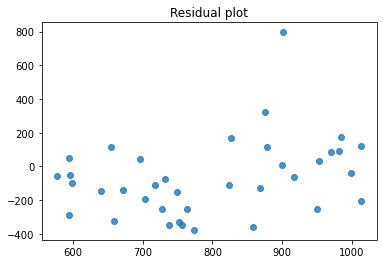

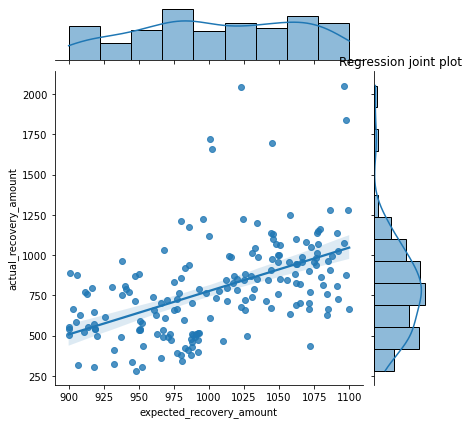

In [25]:
#Task 1.6.2: Regression modeling: no threshold.

#Dropping the unnecessary columns from the data frame for the window $900-1100 and copying it into 'noTh_copy' dataframe.
noTh_copy = data_win4.drop(columns=col, axis=1)
noTh_copy.info()
# Split the data into features (X) and target variable (y)
X = noTh_copy[['expected_recovery_amount']]
y = noTh_copy['actual_recovery_amount']

# Add a constant term (intercept)
X = sm.add_constant(X)

# Split the data into training and testing sets (test_size = 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print model summary
print(model.summary())

# Calculate RMSE
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE = ",rmse)

# Regression diagnostics- Residual plot analysis
residuals=y_test-y_pred
sns.regplot(x=y_pred, y=residuals, scatter=True, 
             fit_reg=False)
plt.title("Residual plot")
plt.show()
residuals.describe()

#Creating a joint scatter plot with the regression line
sns.jointplot(x=noTh_copy["expected_recovery_amount"], y = noTh_copy["actual_recovery_amount"], data=noTh_copy, kind="reg")

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.298
Model:                                OLS   Adj. R-squared:                  0.290
Method:                     Least Squares   F-statistic:                     38.44
Date:                    Wed, 04 Oct 2023   Prob (F-statistic):           1.22e-14
Time:                            20:44:44   Log-Likelihood:                -1280.7
No. Observations:                     184   AIC:                             2567.
Df Residuals:                         181   BIC:                             2577.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

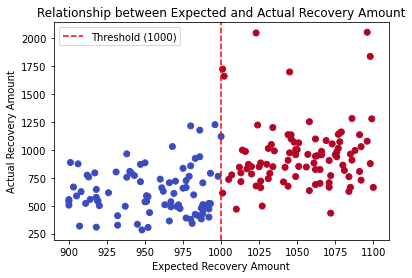

Confidence Intervals for Coefficients:
                                    0            1
const                    -1335.751185  1148.098823
expected_recovery_amount    -0.548334     2.048834
above_threshold            108.906726   403.776999


In [27]:
#Task 1.7: Regression modeling: adding true threshold. The model adds an indicator of the true threshold to the model.

# Create an indicator variable based on the threshold (=$1000)
if 'expected_recovery_amount' in noTh_copy.columns:
    noTh_copy['above_threshold'] = (noTh_copy['expected_recovery_amount'] > 1000).astype(int)
noTh_copy.head()

# Define the features (X) and the target variable (y)
X = noTh_copy[['expected_recovery_amount', 'above_threshold']]
y = noTh_copy['actual_recovery_amount']

# Add a constant term (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

# Calculate R-squared
r2 = model.rsquared

# Calculate RMSE
y_pred = model.predict(X)
rmse = np.sqrt(np.mean((y - y_pred) ** 2))

# Print R-squared and RMSE
print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the relationship between expected and actual recovery amount
plt.scatter(noTh_copy['expected_recovery_amount'], noTh_copy['actual_recovery_amount'], c=noTh_copy['above_threshold'], cmap='coolwarm')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.title('Relationship between Expected and Actual Recovery Amount')
plt.axvline(x=1000, color='red', linestyle='--', label='Threshold (1000)')
plt.legend()
plt.show()

#Compute the confidence interval
confidence_intervals = model.conf_int()

# Print the confidence intervals
print("Confidence Intervals for Coefficients:")
print(confidence_intervals)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 192 to 291
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   expected_recovery_amount  100 non-null    int64  
 1   actual_recovery_amount    100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.3 KB
                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.270
Model:                                OLS   Adj. R-squared:                  0.255
Method:                     Least Squares   F-statistic:                     17.90
Date:                    Wed, 04 Oct 2023   Prob (F-statistic):           2.42e-07
Time:                            20:47:39   Log-Likelihood:                -700.65
No. Observations:                     100   AIC:                             1407.
Df Residuals:                          97  

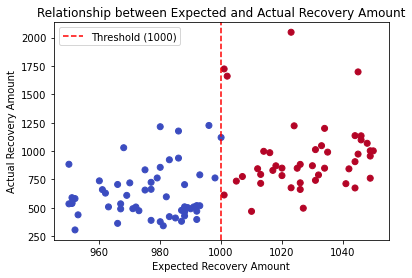

Confidence Intervals for Coefficients:
                                    0            1
const                    -4755.906434  2550.443370
expected_recovery_amount    -1.970774     5.513345
above_threshold              6.406212   452.933497


In [28]:
#Task 1.8: Repeat the analysis for the window of expected recovery amount from $950 to $1050 to see if we get similar results.

#Copying the data frame for the window $950-1050
th = data_win5.copy()

#Dropping the unnecessary columns
th_copy = th.drop(columns=col, axis=1)
#print(threshold_copy.columns)
th_copy.info()

# Create an indicator variable based on the threshold (=$1000)
if 'expected_recovery_amount' in th_copy.columns:
    th_copy['above_threshold'] = (th_copy['expected_recovery_amount'] > 1000).astype(int)
noTh_copy.head()

# Define the features (X) and the target variable (y)
X = th_copy[['expected_recovery_amount', 'above_threshold']]
y = th_copy['actual_recovery_amount']

# Add a constant term (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

# Calculate R-squared
r2 = model.rsquared

# Calculate RMSE
y_pred = model.predict(X)
rmse = np.sqrt(np.mean((y - y_pred) ** 2))

# Print R-squared and RMSE
print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the relationship between expected and actual recovery amount
plt.scatter(th_copy['expected_recovery_amount'], th_copy['actual_recovery_amount'], c=th_copy['above_threshold'], cmap='coolwarm')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.title('Relationship between Expected and Actual Recovery Amount')
plt.axvline(x=1000, color='red', linestyle='--', label='Threshold (1000)')
plt.legend()
plt.show()

#Compute the confidence interval
confidence_intervals = model.conf_int()

# Print the confidence intervals
print("Confidence Intervals for Coefficients:")
print(confidence_intervals)

Coeeficients are distinctively different for the windows $900-1100 & $950-1050